## Decision Tree

### Classification Problem
Predict the collection (amount) made by a movie based on 17 features

In [1]:
# data wrangling libraries
import numpy as np
import pandas as pd

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
moviedf = pd.read_csv("Dataset/Movie_classification.csv")
moviedf.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [3]:
moviedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

#### Data Preparation

In [4]:
# Missing Value Imputation
moviedf['Time_taken'].mean()

157.39149797570855

In [5]:
moviedf['Time_taken'].fillna(value=moviedf['Time_taken'].mean(),inplace=True)

In [6]:
moviedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [7]:
# Dummy Variable Creation - categorical variable to numerical variable
moviedf = pd.get_dummies(moviedf,columns=['3D_available'],drop_first= True)

In [8]:
moviedf = pd.get_dummies(moviedf,columns=['Genre'],drop_first= False)

In [9]:
moviedf.sample(10)

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Action,Genre_Comedy,Genre_Drama,Genre_Thriller
281,20.7410,61.66,0.5571,38707.240,110.7,7.225,7.540,7.215,7.530,9.02,...,285.664,48,422,70800,1,1,0,1,0,0
212,24.3438,76.18,0.5110,32257.885,127.3,8.170,8.210,8.100,8.215,8.28,...,263.584,20,527,44800,1,1,0,0,0,1
421,160.4518,91.20,0.2820,33363.330,168.8,9.010,9.215,9.060,8.965,7.96,...,202.272,29,756,28400,0,0,0,1,0,0
425,337.2060,91.20,0.3210,32752.280,168.9,8.925,9.145,9.015,9.095,7.96,...,301.328,51,674,16600,1,1,0,0,1,0
416,236.6840,91.20,0.3210,37674.010,164.3,9.050,9.230,8.980,9.100,7.96,...,201.200,35,647,15000,0,1,0,0,0,1
266,35.7140,62.94,0.3530,38962.770,158.1,8.890,9.070,8.820,8.955,9.40,...,204.912,41,578,61400,1,0,0,0,0,1
114,22.8462,75.02,0.4530,34740.970,157.7,8.730,8.930,8.855,8.975,8.44,...,242.960,39,570,37000,0,0,1,0,0,0
177,21.0850,63.10,0.4900,35079.825,146.9,8.325,8.360,8.295,8.380,8.68,...,283.936,31,474,49200,0,1,0,0,1,0
225,30.5386,67.40,0.4960,48467.375,156.5,8.435,8.695,8.525,8.560,7.52,...,268.000,20,570,100000,1,1,0,0,0,1
206,24.5938,76.18,0.5110,35140.930,126.0,7.685,7.880,7.765,7.955,7.28,...,223.904,52,511,48800,0,1,0,0,0,1


In [10]:
moviedf.shape

(506, 22)

In [11]:
# Data Split - independent variables and dependent variable
x = moviedf.loc[:,moviedf.columns!="Start_Tech_Oscar"]
type(x)

pandas.core.frame.DataFrame

In [12]:
x.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Action,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,23,494,48000,1,0,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,42,462,43200,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,38,458,69400,0,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,45,472,66800,1,0,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,55,395,72400,0,0,0,1,0


In [13]:
x.shape

(506, 21)

In [14]:
y= moviedf["Start_Tech_Oscar"]
type(y)

pandas.core.series.Series

In [15]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Start_Tech_Oscar, dtype: int64

In [16]:
y.shape

(506,)

In [17]:
# Train and Test Split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 21)
(102, 21)
(404,)
(102,)


#### Simple Classification Tree (Decision Tree Model)

In [19]:
# Decision Tree Model
clftree = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf=20)

In [20]:
clftree.fit(X_train,y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [21]:
# Prediction test using test data on trained model
y_train_pred = clftree.predict(X_train) 
y_test_pred =  clftree.predict(X_test)

In [22]:
y_test_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

#### Evaluate Model Performance

In [23]:
confusion_matrix(y_test,y_test_pred)

array([[40,  4],
       [44, 14]], dtype=int64)

In [24]:
accuracy_score(y_test,y_test_pred)

0.5294117647058824

#### Plotting Decision Tree

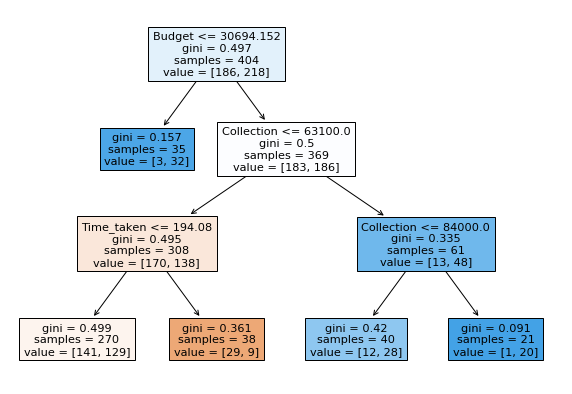

In [25]:
fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clftree, 
                   feature_names=X_train.columns,
                   filled=True)

#### Ensemble Technique 1: Bagging

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

In [26]:
from sklearn.ensemble import BaggingClassifier

In [27]:
bag_clf = BaggingClassifier(base_estimator=clftree, n_estimators=100, bootstrap=True, random_state=42)

In [28]:
bag_clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=20,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,
  

In [29]:
confusion_matrix(y_test, bag_clf.predict(X_test))

array([[28, 16],
       [29, 29]], dtype=int64)

In [30]:
accuracy_score(y_test, bag_clf.predict(X_test))

0.5588235294117647

#### Ensemble Technique 2: Random Forest
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf_clf = RandomForestClassifier(n_estimators=100, criterion="gini", max_features="sqrt", random_state=42)

In [33]:
rf_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [34]:
confusion_matrix(y_test, rf_clf.predict(X_test))

array([[24, 20],
       [19, 39]], dtype=int64)

In [35]:
accuracy_score(y_test, rf_clf.predict(X_test))

0.6176470588235294

In [48]:
rf_clf.score(X_test,y_test)

0.6176470588235294

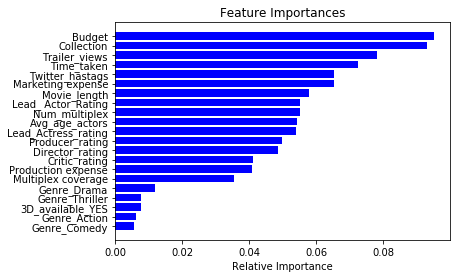

In [36]:
features = X_train.columns
importances = rf_clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Hyperparameter Tuning using Grid Search
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html (using random forest model)

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
rnd_fst = RandomForestClassifier(n_estimators=250, random_state=42)

In [39]:
prams_grid = {
                "max_features" : [4,5,6,7,8,9,10],
                "min_samples_split" : [2,3,10]
            }

In [40]:
grid_search = GridSearchCV(estimator=rnd_fst, param_grid=prams_grid, scoring="accuracy", cv=5)

In [41]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=250, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [42]:
grid_search.best_params_

{'max_features': 5, 'min_samples_split': 3}

In [43]:
grid_search.best_score_

0.6312345679012344

In [44]:
best_rf = grid_search.best_estimator_

In [45]:
accuracy_score(y_test,best_rf.predict(X_test))

0.5784313725490197

In [46]:
confusion_matrix(y_test,best_rf.predict(X_test))

array([[25, 19],
       [24, 34]], dtype=int64)

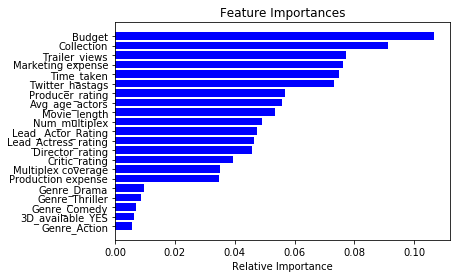

In [47]:
features = X_train.columns
importances = best_rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Ensemble Technique 3: Boosting
* Gradient Boosting
* AdaBoost
* XGBoost